In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("data_2000_rows.csv")

In [5]:
df

,age,income,visits,previous_purchases,category,monthly_spend
0,56,51593.15715,1.0,NaN,A,153.74
1,69,70266.32072,5.0,0.0,A,180.71
2,46,NaN,2.0,0.0,B,64.11
3,32,24317.18232,7.0,1.0,A,125.30
4,60,76677.19240,NaN,1.0,C,212.34
...,...,...,...,...,...,...
1995,52,50418.94731,6.0,2.0,B,198.18
1996,61,28418.49000,4.0,NaN,A,131.13
1997,77,61782.78718,3.0,1.0,A,138.75
1998,62,NaN,2.0,0.0,C,152.42


In [7]:
df.head(10)

,age,income,visits,previous_purchases,category,monthly_spend
0,56,51593.15715,1.0,NaN,A,153.74
1,69,70266.32072,5.0,0.0,A,180.71
2,46,NaN,2.0,0.0,B,64.11
3,32,24317.18232,7.0,1.0,A,125.30
4,60,76677.19240,NaN,1.0,C,212.34
5,25,NaN,2.0,NaN,A,170.04
6,78,90847.92845,6.0,4.0,A,285.58
7,38,59703.50210,NaN,2.0,A,185.62
8,56,NaN,4.0,1.0,A,122.54
9,75,NaN,3.0,1.0,B,173.95


In [8]:
df.tail(10)

,age,income,visits,previous_purchases,category,monthly_spend
1990,56,32720.81766,3.0,4.0,B,159.07
1991,34,22330.92964,5.0,4.0,A,155.89
1992,31,39200.24729,1.0,2.0,A,122.69
1993,48,28160.49051,NaN,1.0,A,78.71
1994,41,NaN,3.0,NaN,A,161.11
1995,52,50418.94731,6.0,2.0,B,198.18
1996,61,28418.49000,4.0,NaN,A,131.13
1997,77,61782.78718,3.0,1.0,A,138.75
1998,62,NaN,2.0,0.0,C,152.42
1999,51,57156.76697,3.0,3.0,B,190.52


In [9]:
df.shape

(2000, 6)

In [10]:
df.describe()

,age,income,visits,previous_purchases,monthly_spend
count,2000.000000,1783.000000,1824.000000,1877.000000,2000.000000
mean,49.114000,50932.150715,2.975329,1.517315,146.382540
std,17.926564,19931.520343,1.752968,1.254138,49.811614
min,18.000000,5000.000000,0.000000,0.000000,0.000000
25%,34.000000,37365.849220,2.000000,1.000000,113.075000
50%,49.000000,50911.843290,3.000000,1.000000,146.315000
75%,65.000000,64517.702555,4.000000,2.000000,180.097500
max,79.000000,119917.555800,11.000000,8.000000,318.500000


In [11]:
df.dtypes

,0
age,int64
income,float64
visits,float64
previous_purchases,float64
category,object
monthly_spend,float64


In [12]:
df.isnull().sum()

,0
age,0
income,217
visits,176
previous_purchases,123
category,77
monthly_spend,0


In [14]:
df.isna().mean()*100

,0
age,0.00
income,10.85
visits,8.80
previous_purchases,6.15
category,3.85
monthly_spend,0.00


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'income'}>],
       [<Axes: title={'center': 'visits'}>,
        <Axes: title={'center': 'previous_purchases'}>],
       [<Axes: title={'center': 'monthly_spend'}>, <Axes: >]],
      dtype=object)

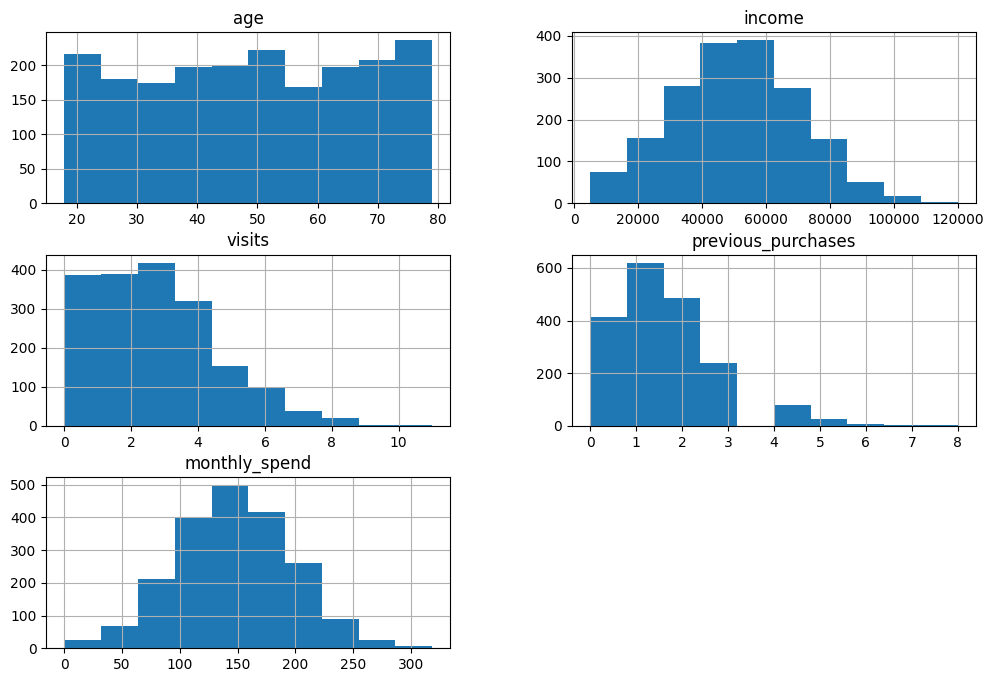

In [16]:
df.hist(figsize=(12,8))

In [19]:
df.isnull().sum()

,0
age,0
income,217
visits,176
previous_purchases,123
category,77
monthly_spend,0


In [20]:
from sklearn.impute import SimpleImputer


In [21]:
num_cols = ["income", "visits", "previous_purchases"]
cat_cols = ["category"]

In [22]:
# numeric impute
num_imp = SimpleImputer(strategy="median")
df[num_cols] = num_imp.fit_transform(df[num_cols])

In [23]:
# categorical impute
cat_imp = SimpleImputer(strategy="most_frequent")
df[cat_cols] = cat_imp.fit_transform(df[cat_cols])

In [24]:
df.isnull().sum()

,0
age,0
income,0
visits,0
previous_purchases,0
category,0
monthly_spend,0


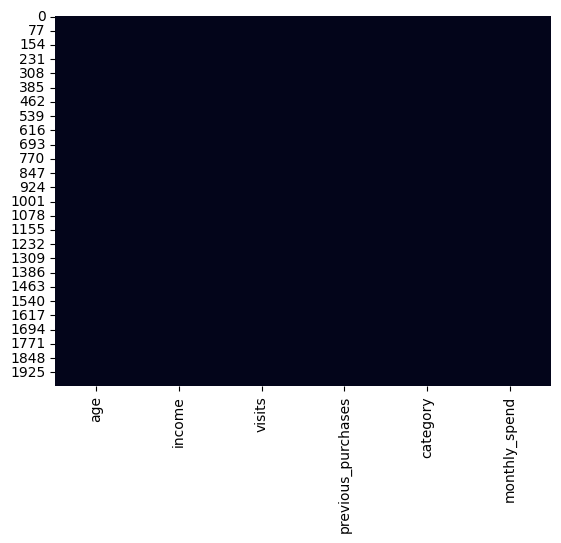

In [25]:
sns.heatmap(df.isna(), cbar=False)
plt.show()

In [26]:
df_drop = df.dropna()


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 2000 non-null   int64  
 1   income              2000 non-null   float64
 2   visits              2000 non-null   float64
 3   previous_purchases  2000 non-null   float64
 4   category            2000 non-null   object 
 5   monthly_spend       2000 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 93.9+ KB


In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [30]:
df.select_dtypes(include=['number']).columns

Index(['age', 'income', 'visits', 'previous_purchases', 'monthly_spend'], dtype='object')

In [31]:
df.select_dtypes(include=['object']).columns


Index(['category'], dtype='object')

In [33]:
numeric = ["age","income","visits","previous_purchases"]
categorical = ["category"]

In [38]:
X = df.drop(columns=["monthly_spend"])
y = df["monthly_spend"]

In [34]:
preprocess = ColumnTransformer([
    ("num", StandardScaler(), numeric),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical)
])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [40]:
X_train.shape

(1500, 5)

In [41]:
y_train.shape

(1500,)

In [42]:
#Linear Regression

In [43]:
model = make_pipeline(preprocess, LinearRegression())
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'income', 'visits',
                                                   'previous_purchases']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['category'])])),
                ('linearregression', LinearRegression())])

In [44]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor


In [45]:
rf_model = make_pipeline(preprocess, RandomForestRegressor(n_estimators=100))
rf_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'income', 'visits',
                                                   'previous_purchases']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['category'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [46]:
#Evaluate

In [48]:
from sklearn.metrics import mean_squared_error, r2_score

preds = model.predict(X_test)
print("RMSE:", mean_squared_error(y_test, preds))
print("R²:", r2_score(y_test, preds))

RMSE: 742.0367619001697
R²: 0.6970215428838754


Iterate and Improve

** Try MICE imputation

** Add features

** Tune model hyperparameters

** Run cross-validation